In [867]:
import numpy as np
import cv2
import skimage.color

In [868]:
from PIL import Image

from os.path import join
from PIL import Image
import matplotlib.pyplot as plt


In [869]:
import sys
sys.path.append('python')

from helper import briefMatch
from helper import computeBrief
from helper import corner_detection
from helper import plotMatches
from helper import plotMatches
from matchPics import matchPics


In [870]:
from scipy import ndimage

In [871]:
import easydict
 
opts = easydict.EasyDict({
        "sigma": 0.15,
        "ratio": 0.7,
        "max_iters": 500,
        "inlier_tol": 2.0
})


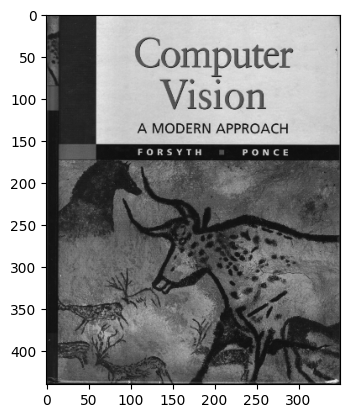

In [795]:
I1_path = '../data/cv_cover.jpg'

# I1 = Image.open(img1_path)
I1 = Image.open(I1_path).convert("RGB")  
# I1 = cv2.imread(I1_path)
I1 = np.array(I1).astype(np.float32) / 255 #normalize

plt.imshow(I1)

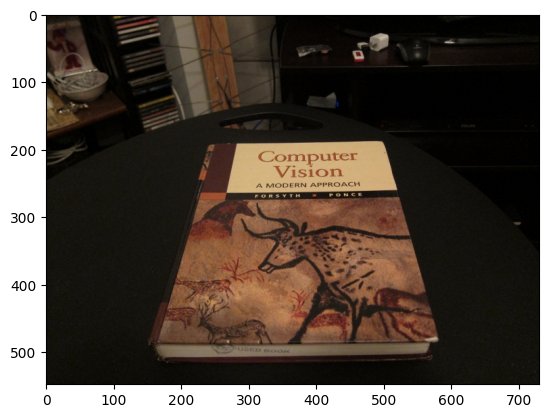

In [796]:
I2_path = '../data/cv_desk.png'

# img = Image.open(img_path)
I2 = Image.open(I2_path).convert("RGB")
# I2 = Image.open(I2_path)

# img = skimage.color.rgb2lab(img)
# I2 = cv2.imread(I2_path)

I2 = np.array(I2).astype(np.float32)/ 255 #normalize

plt.imshow(I2)

In [797]:
sigma=float(0.15)
ratio=float(0.7)
max_iters=int(500)
inlier_tol=float(2.0)

In [855]:
I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

locs1 = corner_detection(I1_gray, sigma)
locs2 = corner_detection(I2_gray, sigma)

desc1, locs1 = computeBrief(I1_gray, locs1)
desc2, locs2 = computeBrief(I2_gray, locs2)

matches = briefMatch(desc2, desc1, ratio)

In [801]:
locs1

array([[141, 256],
       [164, 248],
       [141, 274],
       ...,
       [283, 188],
       [271, 176],
       [275, 173]])

In [705]:
desc1.shape

(945, 256)

In [763]:
matches

array([[  2,   4],
       [  6,  10],
       [  7,  16],
       [  9,   3],
       [ 10,   5],
       [ 15,   0],
       [ 16,  23],
       [ 17,   1],
       [ 18,  99],
       [ 19,  26],
       [ 22,  41],
       [ 23,  12],
       [ 25,  59],
       [ 26,  50],
       [ 28,  40],
       [ 29,  15],
       [ 30,  33],
       [ 31,  81],
       [ 32,  44],
       [ 34,  58],
       [ 35,  24],
       [ 36,  19],
       [ 38,  31],
       [ 39,  36],
       [ 40,  14],
       [ 42,  71],
       [ 43,  11],
       [ 48,  43],
       [ 50,  61],
       [ 52,  54],
       [ 53,  48],
       [ 54,  39],
       [ 55, 109],
       [ 58,  29],
       [ 65,  67],
       [ 67,  52],
       [ 69,  70],
       [ 73,  56],
       [ 74,  21],
       [ 75, 121],
       [ 77,  49],
       [ 78,  83],
       [ 82,  73],
       [ 87,  77],
       [ 88,  95],
       [ 90,  65],
       [ 91,  68],
       [ 94, 108],
       [ 95,  97],
       [ 98,  74],
       [101, 104],
       [103, 110],
       [105,

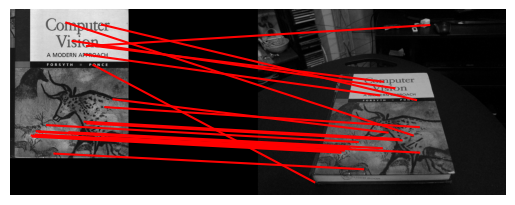

In [13]:
plotMatches(I1, I2, matches, locs1, locs2)

In [25]:
from tqdm import tqdm

# Q 2.1.6

In [26]:
#should be changed to opt
sigma=float(0.15)
ratio=float(0.7)
max_iters=int(500)
inlier_tol=float(2.0)

#Read the image and convert to grayscale, if necessary

img_path = '../data/cv_cover.jpg'

img = Image.open(img_path).convert("RGB")  
img = np.array(img).astype(np.float32) / 255 #normalize

# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

counts_matches = []

for i in tqdm(range(36)):
    # Rotate Image
    #Compute features, descriptors and Match features
    rot_ang = i * 10
    img_rot = ndimage.rotate(img, rot_ang, reshape=False)
    matches, locs1, locs2 = matchPics(img, img_rot) #Should put opt!
    counts_matches.append(matches.shape[0])

plt.bar(range(0, 360, 10), counts_matches, width=10)
plt.show()


100%|███████████████████████████████████████████| 36/36 [04:26<00:00,  7.39s/it]


In [31]:
len(counts_matches)

36

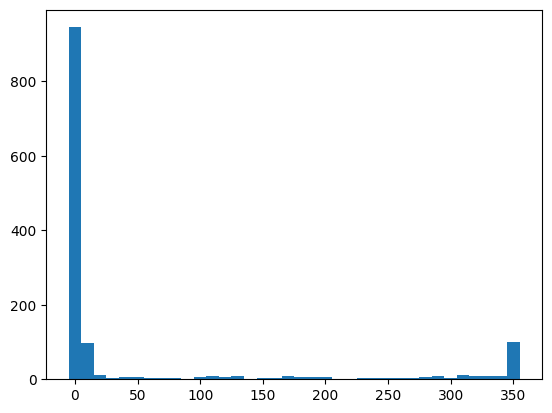

In [51]:
plt.bar(range(0, 360, 10), counts_matches, width=10)
plt.show()

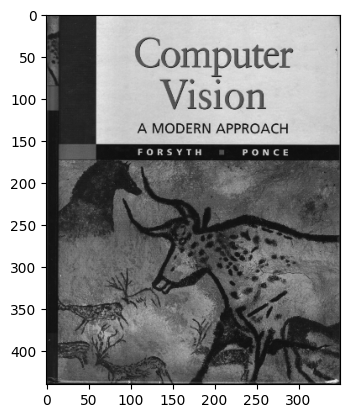

In [663]:
img_path = '../data/cv_cover.jpg'

img = Image.open(img_path).convert("RGB")  
img = np.array(img).astype(np.float32) / 255 #normalize

plt.imshow(img)

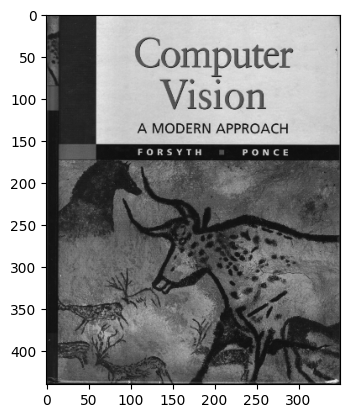

In [664]:
img_rot = ndimage.rotate(img, 360, reshape=False)
plt.imshow(img_rot)


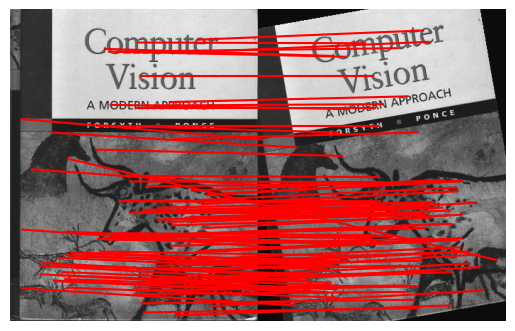

In [13]:
img_path = '../data/cv_cover.jpg'

img = Image.open(img_path).convert("RGB")  
img = np.array(img).astype(np.float32) / 255 #normalize

img_rot = ndimage.rotate(img, 10, reshape=False)
matches, locs1, locs2 = matchPics(img, img_rot) #Should put opt!
plotMatches(img, img_rot, matches, locs1, locs2)


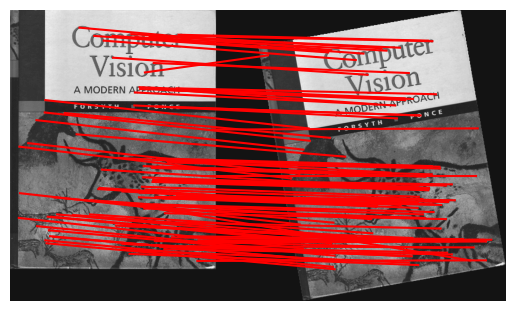

In [716]:
img_path = '../data/cv_cover.jpg'

img = Image.open(img_path).convert("RGB")  
img = np.array(img).astype(np.float32) / 255 #normalize

img_rot = ndimage.rotate(img, 10, reshape=True)
matches, locs1, locs2 = matchPics(img, img_rot, opts) #Should put opt!
plotMatches(img, img_rot, matches, locs1, locs2)


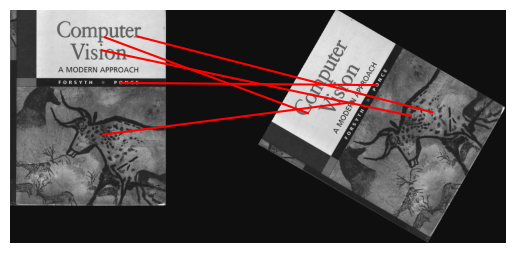

In [717]:
img_rot = ndimage.rotate(img, 60, reshape=True)
matches, locs1, locs2 = matchPics(img, img_rot, opts) #Should put opt!
plotMatches(img, img_rot, matches, locs1, locs2)

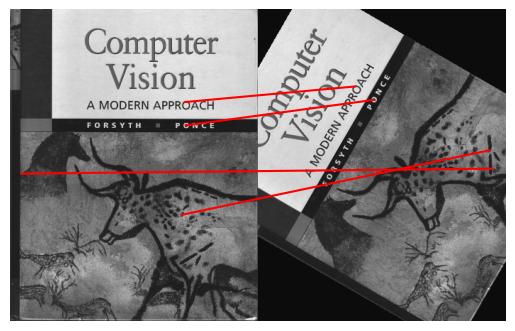

In [722]:
img_rot = ndimage.rotate(img, 60, reshape=False)
matches, locs1, locs2 = matchPics(img, img_rot, opts) #Should put opt!
plotMatches(img, img_rot, matches, locs1, locs2)

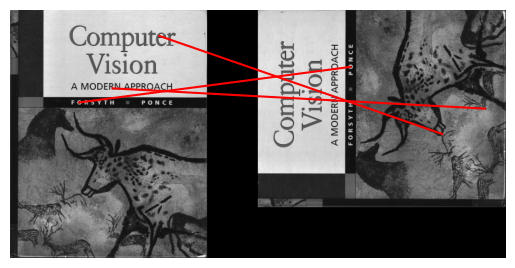

In [718]:
img_rot = ndimage.rotate(img, 90)
matches, locs1, locs2 = matchPics(img, img_rot, opts) #Should put opt!
plotMatches(img, img_rot, matches, locs1, locs2)

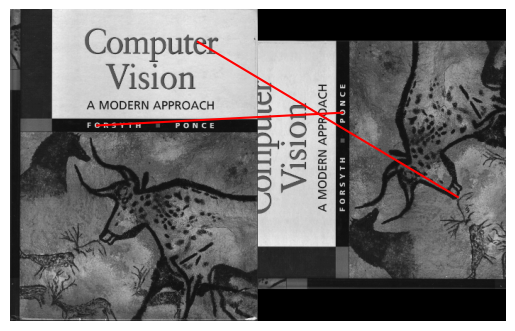

In [721]:
img_rot = ndimage.rotate(img, 90, reshape = False)
matches, locs1, locs2 = matchPics(img, img_rot, opts) #Should put opt!
plotMatches(img, img_rot, matches, locs1, locs2)

In [33]:
matches, locs1, locs2 = matchPics(img, img_rot) #Should put opt!

## 2.1.7

In [838]:
def matchPics_modi(I1, I2, angle_rot, opts):
        """
        Match features across images

        Input
        -----
        I1, I2: Source images
        opts: Command line args

        Returns
        -------
        matches: List of indices of matched features across I1, I2 [p x 2]
        locs1, locs2: Pixel coordinates of matches [N x 2]
        """
        
#         ratio = opts.ratio  #'ratio for BRIEF feature descriptor'
        ratio = 0.7  #'ratio for BRIEF feature descriptor'
        sigma = opts.sigma  #'threshold for corner detection using FAST feature detector'
        
        # TODO: Convert Images to GrayScale
        I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
        I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)
        I2_gray = ndimage.rotate(I2_gray, -angle_rot, reshape = False) # rotate I2 to be aligned with I1.

        # TODO: Detect Features in Both Images
        locs1 = corner_detection(I1_gray, sigma)
        locs2 = corner_detection(I2_gray, sigma)

        # TODO: Obtain descriptors for the computed feature locations
        desc1, locs1 = computeBrief(I1_gray, locs1)
        desc2, locs2 = computeBrief(I2_gray, locs2)

        # TODO: Match features using the descriptors
        matches = briefMatch(desc1, desc2, ratio)
        
        R = np.array([[np.cos(angle_rot*(np.pi/180)), -np.sin(angle_rot*(np.pi/180))], 
                  [np.sin(angle_rot*(np.pi/180)), np.cos(angle_rot*(np.pi/180))]])
        
        #move the center coordinate of locs2 to (0, 0)
        locs2[:,0] = locs2[:,0] - I2_gray.shape[0]/2
        locs2[:,1] = locs2[:,1] - I2_gray.shape[1]/2
        
        #rotate locs according to the original angle
        locs2 = (R @ locs2.T).T
        
        #relocate the center coordinate of locs2
        locs2[:,0] = locs2[:,0] + I2_gray.shape[0]/2
        locs2[:,1] = locs2[:,1] + I2_gray.shape[1]/2
#         locs2 = R @ locs2.T
        
        return matches, locs1, locs2


In [839]:
def briefMatch_modi(desc1,desc2,ratio):

    matches = skimage.feature.match_descriptors(desc1,desc2, 'hamming', cross_check=True,max_ratio=ratio)
    return matches


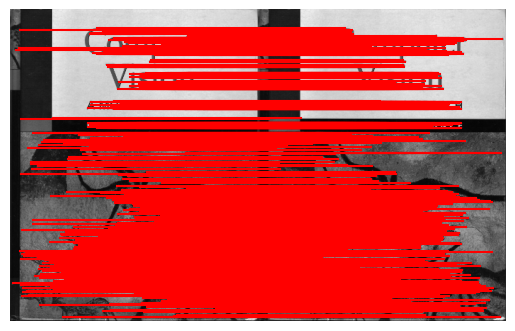

In [840]:
img_rot = ndimage.rotate(img, 0, reshape=False)
matches, locs1, locs2 = matchPics_modi(img, img_rot, 0, opts) #Should put opt!
plotMatches(img, img_rot, matches, locs1, locs2)


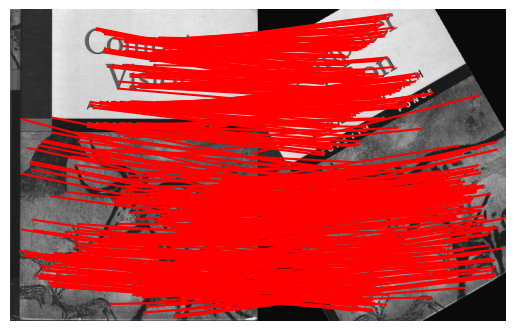

In [841]:
img_rot = ndimage.rotate(img, 30, reshape=False)
matches, locs1, locs2 = matchPics_modi(img, img_rot, 30, opts) #Should put opt!
plotMatches(img, img_rot, matches, locs1, locs2)


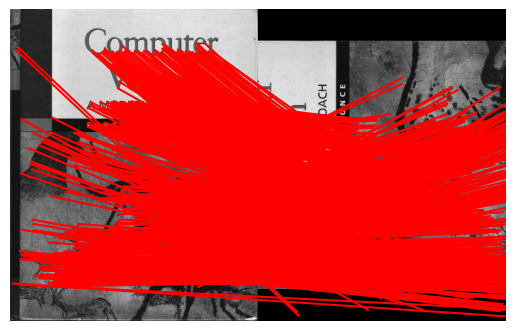

In [836]:
img_rot = ndimage.rotate(img, 90, reshape=False)
matches, locs1, locs2 = matchPics_modi(img, img_rot, 90, opts) #Should put opt!
plotMatches(img, img_rot, matches, locs1, locs2)


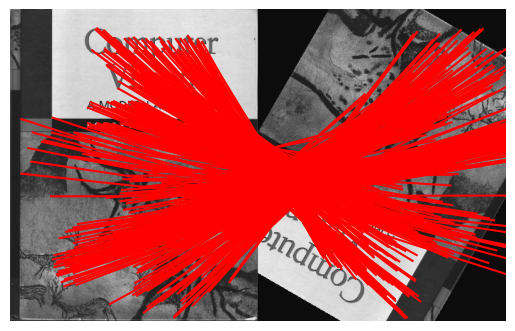

In [837]:
img_rot = ndimage.rotate(img, 150, reshape=False)
matches, locs1, locs2 = matchPics_modi(img, img_rot, 150, opts) #Should put opt!
plotMatches(img, img_rot, matches, locs1, locs2)


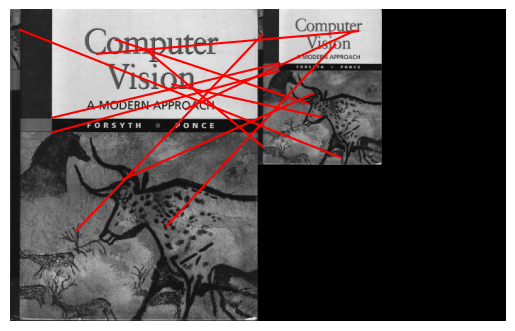

In [894]:
img_resize = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
img_resize.shape

matches, locs1, locs2 = matchPics(img, img_resize, opts) #Should put opt!
plotMatches(img, img_resize, matches, locs1, locs2)


In [873]:
from scipy.ndimage import gaussian_filter


[autoreload of cv2.gapi failed: Traceback (most recent call last):
  File "/Users/HAEJOON/opt/anaconda3/envs/cv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/HAEJOON/opt/anaconda3/envs/cv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/HAEJOON/opt/anaconda3/envs/cv/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 843, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/HAEJOON/opt/anaconda3/envs/cv/lib/python3.8/site-packages/cv2/gapi/__init__.py", line 290, in <module>
    cv.gapi.wip.GStreamerPipeline = cv.gapi_wip_gst_GStreamerPipeline
AttributeError: module 'cv2.gapi' has no attribute 'wip'
]


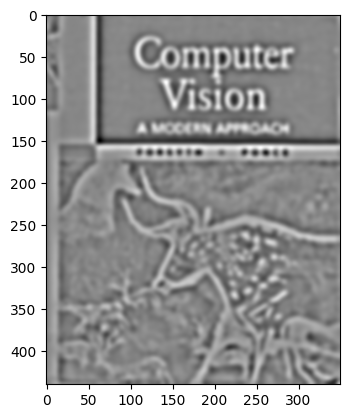

In [944]:
img_dog = gaussian_filter(img, sigma=5, truncate=tr) - gaussian_filter(img, sigma=3, truncate=tr)

img_dog_min = img_dog.min(axis=(0, 1), keepdims=True)
img_dog_max = img_dog.max(axis=(0, 1), keepdims=True)
img_dog = (img_dog - img_dog_min) / (img_dog_max - img_dog_min)

plt.imshow(img_dog)

In [945]:
opts = easydict.EasyDict({
        "sigma": 0.15,
        "ratio": 0.8,
        "max_iters": 500,
        "inlier_tol": 2.0
})

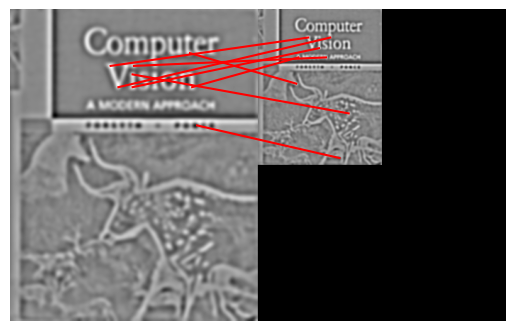

In [946]:
img_dog_resize = cv2.resize(img_dog, (int(img_dog.shape[1]/2), int(img_dog.shape[0]/2)))

matches, locs1, locs2 = matchPics(img_dog, img_dog_resize, opts) #Should put opt!
plotMatches(img_dog, img_dog_resize, matches, locs1, locs2)


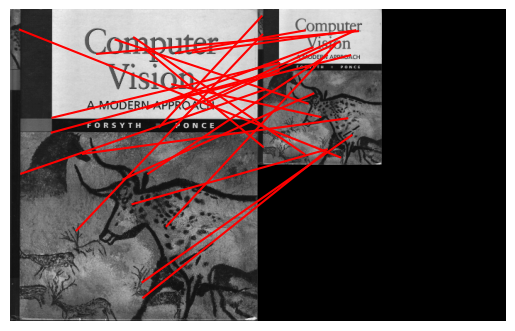

In [927]:
img_resize = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
img_resize.shape

matches, locs1, locs2 = matchPics(img, img_resize, opts) #Should put opt!
plotMatches(img, img_resize, matches, locs1, locs2)


In [887]:
img_dog.min()

-0.6069256

# 2.2

In [16]:
I1_path = '../data/cv_cover.jpg'
I1 = Image.open(I1_path).convert("RGB")  
I1 = np.array(I1).astype(np.float32) / 255 #normalize

I2_path = '../data/cv_desk.png'
I2 = Image.open(I2_path).convert("RGB")
I2 = np.array(I2).astype(np.float32)/ 255 #normalize

matches, locs1, locs2 = matchPics(I1, I2)

In [18]:
matches.shape

(20, 2)

In [23]:
locs1.shape

(945, 2)

In [39]:
x1 = matches
indices = np.random.randint(len(x1), size=4)


In [339]:
I1_path = '../data/cv_cover.jpg'
cv_cover = Image.open(I1_path).convert("RGB")  
cv_cover = np.array(cv_cover).astype(np.float32) / 255 #normalize

I2_path = '../data/cv_desk.png'
cv_desk = Image.open(I2_path).convert("RGB")
cv_desk = np.array(cv_desk).astype(np.float32)/ 255 #normalize

I3_path = '../data/hp_cover.jpg'
hp_cover = Image.open(I3_path).convert("RGB")
hp_cover = np.array(hp_cover).astype(np.float32)/ 255 #normalize

# # opts = get_opts()
# cv_cover = cv2.imread('../data/cv_cover.jpg')
# cv_desk = cv2.imread('../data/cv_desk.png')
# hp_cover = cv2.imread('../data/hp_cover.jpg')

print("shapes are: ", cv_cover.shape, hp_cover.shape)

h, w = cv_cover.shape[0], cv_cover.shape[1]

resized = np.zeros(cv_cover.shape)
resized1 = cv2.resize(hp_cover[:, :, 0], (w, h))
resized2 = cv2.resize(hp_cover[:, :, 1], (w, h))
resized3 = cv2.resize(hp_cover[:, :, 2], (w, h))

resized[:, :, 0] = resized1
resized[:, :, 1] = resized2
resized[:, :, 2] = resized3

print("shapes are: ", cv_cover.shape, resized.shape)
# cv2.imwrite('resized.png', resized)
# rotated_image = ndimage.rotate(cv_desk, 40, reshape=False)

matches, l1, l2 = matchPics(cv_desk, cv_cover)

shapes are:  (440, 350, 3) (295, 200, 3)
shapes are:  (440, 350, 3) (440, 350, 3)


In [351]:
matches1, matches2 = matches[:, 0], matches[:, 1]
locs1, locs2 = [], []


locs1 = l1[matches[:, 0]]
locs2 = l2[matches[:, 1]]

print("shape of locs1 to ransac is: ", locs1.shape)
print("shape of locs2 to ransac is: ", locs2.shape)

shape of locs1 to ransac is:  (14, 2)
shape of locs2 to ransac is:  (14, 2)


[0 1 0 1 1 0 0 0 1 1 1 0 1 0]
[0 1 0 1 0 1 0 0 1 1 1 1 1 0]
[0 1 0 1 1 1 0 0 1 1 1 1 1 0]
shape of output h is:  (3, 3)
shape of inliers is:  (14,)
h is:  [[ 1.63055501e-01 -3.60318816e-02  1.68448661e+02]
 [-2.93654961e-01  5.76315792e-01  2.02754178e+02]
 [-7.87567978e-04 -7.71966172e-05  8.39663597e-01]]
shape of im is:  (548, 731, 3) (548, 731, 3)
shape of warped image:  (548, 731, 3)
shape of template is:  (548, 731, 3)
shaoe of mask is:  (548, 731, 3)


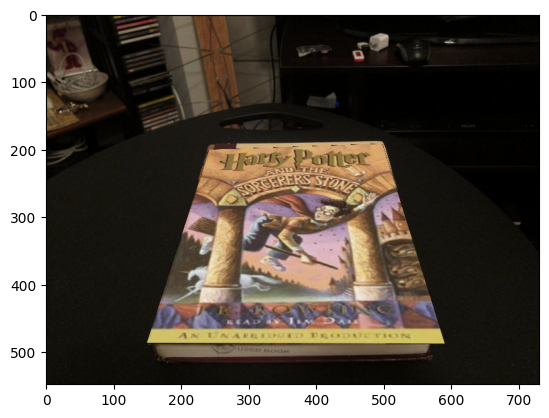

In [334]:
h, inliers = computeH_ransac(locs1, locs2)
print("shape of output h is: ", h.shape)
print("shape of inliers is: ", inliers.shape)

print("h is: ", h)

im = cv2.warpPerspective(resized.swapaxes(0, 1), h, (cv_desk.shape[0], cv_desk.shape[1])).swapaxes(0, 1)
# cv2.imwrite('perspective3.png', im)
print("shape of im is: ", im.shape, cv_desk.shape)

# print("shape of im is: ", im.shape)
final_image = compositeH(h, cv_desk, resized)

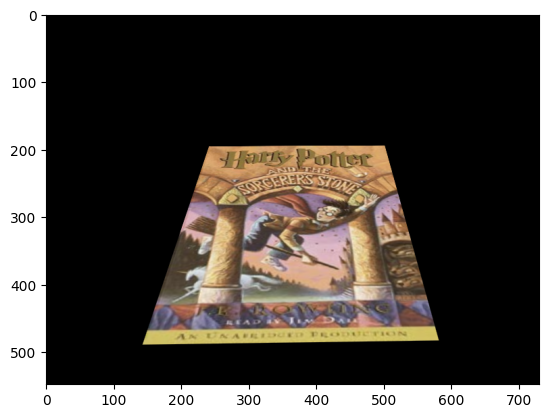

In [332]:
plt.imshow(im)

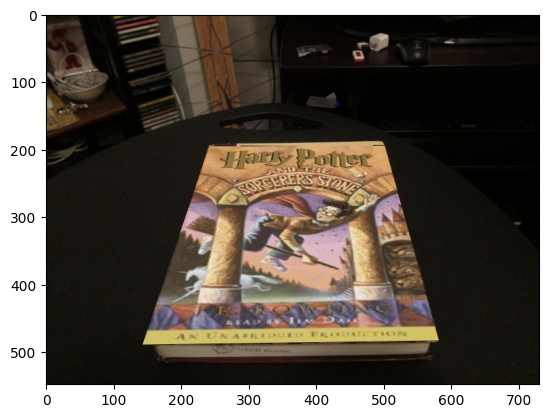

In [328]:
plt.imshow(final_image)

# Q3

In [522]:
%load_ext autoreload
%autoreload 2

from planarH import computeH_ransac, computeH, computeH_norm, compositeH # Import necessary functions
sys.path.append('../ec')
from loadVid import loadVid
from opts import get_opts
from tqdm import tqdm


In [654]:
img_cv_covoer_path = '../data/cv_cover.jpg'
img_cv_cover = Image.open(img_cv_covoer_path).convert("RGB")  
img_cv_cover = np.array(img_cv_cover).astype(np.float32) / 255 #normalize

vd_book_path = "../data/book.mov"
vd_source_path = "../data/ar_source.mov"

vd_book = loadVid(vd_book_path)
vd_source = loadVid(vd_source_path)

ar_vd_list = []

for i in tqdm(range(10, 60)):
# for i in tqdm(range(len(vd_source))):

    frame_book = np.array(vd_book[i]).astype(np.float32) / 255
    frame_source = np.array(vd_source[i]).astype(np.float32) / 255 #normalize

    # cv_cover: 440x350x3, frame_source: 360x640x3 -> crop frame to get rid of black background and have the same ratio as cv_cover  
    # then resize the frame
    frame_source_crop = frame_source[44:314, 212:427, :]
    h_cv_cover, w_cv_cover = img_cv_cover.shape[0], img_cv_cover.shape[1]
    frame_source_resized = cv2.resize(frame_source_crop, (w_cv_cover, h_cv_cover))
    # rotated_image = ndimage.rotate(cv_desk, 40, reshape=False)

    matches, locs1, locs2 = matchPics(frame_book, img_cv_cover, opts)

    locs1_matched = locs1[matches[:, 0]]
    locs2_matched = locs2[matches[:, 1]]

    bestH2to1, inliers = computeH_ransac(locs1_matched, locs2_matched, opts)

    img_composited = compositeH(bestH2to1, frame_book, frame_source_resized)
    
    ar_vd_list.append(img_composited)

ar_vd = np.stack(ar_vd_list, axis = 0)

width = ar_vd.shape[2]
hieght = ar_vd.shape[1]
channel = ar_vd.shape[3]
 
fps = 25.5 #similar fps to source video

fourcc = cv2.VideoWriter_fourcc(*'MJPG') # FourCC is a 4-byte code used to specify the video codec.

video = cv2.VideoWriter('ar_test.avi', fourcc, float(fps), (width, hieght))
 
for frame_count in range(len(ar_vd)):
    img = (ar_vd[frame_count]*255).astype(np.uint8)
    video.write(img)

video.release()

100%|███████████████████████████████████████████| 50/50 [06:51<00:00,  8.23s/it]


In [658]:
ar_vd = np.stack(ar_vd_list, axis = 0)

width = ar_vd.shape[2]
hieght = ar_vd.shape[1]
channel = ar_vd.shape[3]
 
fps = 25.5 #similar fps to source video

fourcc = cv2.VideoWriter_fourcc(*'MJPG') # FourCC is a 4-byte code used to specify the video codec.

video = cv2.VideoWriter('ar_test.avi', fourcc, float(fps), (width, hieght))
 
for frame_count in range(len(ar_vd)):
    img = (ar_vd[frame_count]*255).astype(np.uint8)
    video.write(img)

video.release()

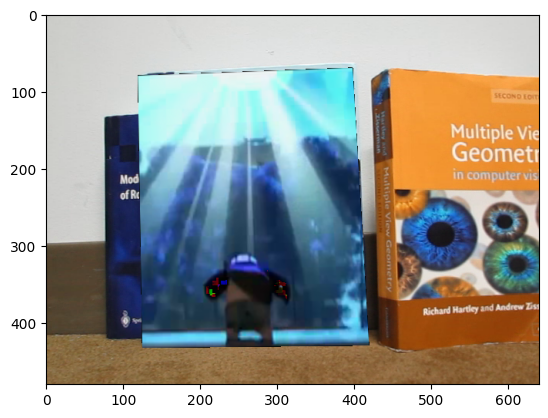

In [656]:
plt.imshow(ar_vd[0])

## Q3.2 EC

In [947]:

ar_vd_list = []


In [956]:
import time

In [ ]:
start = time.time()
# for i in tqdm(range(110, 130)):
img_cv_covoer_path = '../data/cv_cover.jpg'
img_cv_cover = Image.open(img_cv_covoer_path).convert("RGB")  
img_cv_cover = np.array(img_cv_cover).astype(np.float32) / 255 #normalize

vd_book_path = "../data/book.mov"
vd_source_path = "../data/ar_source.mov"

vd_book = loadVid(vd_book_path)
vd_source = loadVid(vd_source_path)

H_list = []
ar_vd_even_list = []
length_vid = len(vd_source) - len(vd_source)%2 #Simply cut the last frame for even number of frames

# for i in tqdm(range(len(vd_source))):
for i in tqdm(range(int(length_vid/2))):
    frame_book = np.array(vd_book[2*i]).astype(np.float32) / 255
    frame_source = np.array(vd_source[2*i]).astype(np.float32) / 255 #normalize

    # cv_cover: 440x350x3, frame_source: 360x640x3 -> crop frame to get rid of black background and have the same ratio as cv_cover  
    # then resize the frame
    frame_source_crop = frame_source[44:314, 212:427, :]
    h_cv_cover, w_cv_cover = img_cv_cover.shape[0], img_cv_cover.shape[1]
    frame_source_resized = cv2.resize(frame_source_crop, (w_cv_cover, h_cv_cover))
    # rotated_image = ndimage.rotate(cv_desk, 40, reshape=False)

    matches, locs1, locs2 = matchPics(frame_book, img_cv_cover, opts)

    locs1_matched = locs1[matches[:, 0]]
    locs2_matched = locs2[matches[:, 1]]

    bestH2to1, inliers = computeH_ransac(locs1_matched, locs2_matched, opts)
    H_list.append(bestH2to1)
    
    img_composited = compositeH(bestH2to1, frame_book, frame_source_resized)
    
    ar_vd_even_list.append(img_composited)
    
    ar_vd_odd_list = []

for i in range(len(H_list)-1):
    frame_book = np.array(vd_book[2*i+1]).astype(np.float32) / 255
    frame_source = np.array(vd_source[2*i+1]).astype(np.float32) / 255 #normalize

    # cv_cover: 440x350x3, frame_source: 360x640x3 -> crop frame to get rid of black background and have the same ratio as cv_cover  
    # then resize the frame
    frame_source_crop = frame_source[44:314, 212:427, :]
    h_cv_cover, w_cv_cover = img_cv_cover.shape[0], img_cv_cover.shape[1]
    frame_source_resized = cv2.resize(frame_source_crop, (w_cv_cover, h_cv_cover))

    bestH2to1 = (H_list[i] + H_list[i+1])/2

    img_composited = compositeH(bestH2to1, frame_book, frame_source_resized)

    ar_vd_odd_list.append(img_composited)

ar_vd_list = []
for i in range(length_vid-1):
    if i%2 == 0:
        ar_vd_list.append(ar_vd_even_list[int(i/2)])
    else:
        ar_vd_list.append(ar_vd_odd_list[int((i-1)/2)])
    print(i)
    
    
# ar_vd = np.stack(ar_vd_list, axis = 0)

# width = ar_vd.shape[2]
# hieght = ar_vd.shape[1]
# channel = ar_vd.shape[3]
 
# fps = 25.5 #similar fps to source video

# fourcc = cv2.VideoWriter_fourcc(*'MJPG') # FourCC is a 4-byte code used to specify the video codec.

# video = cv2.VideoWriter('ar_result_modi.avi', fourcc, float(fps), (width, hieght))
 
# for frame_count in range(len(ar_vd)):
#     img = (ar_vd[frame_count]*255).astype(np.uint8)
#     video.write(img)

# video.release()
print("time :", time.time() - start, "s")

  1%|▌                                          | 3/255 [00:25<35:09,  8.37s/it]

In [968]:
ar_vd_odd_list = []
for i in range(len(H_list)-1):
    frame_book = np.array(vd_book[2*i+1]).astype(np.float32) / 255
    frame_source = np.array(vd_source[i]).astype(np.float32) / 255 #normalize

    # cv_cover: 440x350x3, frame_source: 360x640x3 -> crop frame to get rid of black background and have the same ratio as cv_cover  
    # then resize the frame
    frame_source_crop = frame_source[44:314, 212:427, :]
    h_cv_cover, w_cv_cover = img_cv_cover.shape[0], img_cv_cover.shape[1]
    frame_source_resized = cv2.resize(frame_source_crop, (w_cv_cover, h_cv_cover))
    
    bestH2to1 = (H_list[i] + H_list[i+1])/2
    
    img_composited = compositeH(bestH2to1, frame_book, frame_source_resized)
    
    ar_vd_odd_list.append(img_composited)
    


In [977]:
ar_vd_even_list[5]

IndexError: list index out of range

In [981]:
len(ar_vd_odd_list)

4

In [982]:
length_vid = 10
ar_vd_list = []
for i in range(length_vid-1):
    if i%2 == 0:
        ar_vd_list.append(ar_vd_even_list[int(i/2)])
    else:
        ar_vd_list.append(ar_vd_odd_list[int((i-1)/2)])
    print(i)

0
1
2
3
4
5
6
7
8


In [983]:
len(ar_vd_list)

9

In [978]:
ar_vd_list

[]

In [962]:
H_set = np.stack(H_list, axis = 0)
H_set.shape

(5, 3, 3)

In [850]:
i = 0
frame_book = np.array(vd_book[i]).astype(np.float32) / 255
frame_source = np.array(vd_source[i]).astype(np.float32) / 255 #normalize

# cv_cover: 440x350x3, frame_source: 360x640x3 -> crop frame to get rid of black background and have the same ratio as cv_cover  
# then resize the frame
frame_source_crop = frame_source[44:314, 212:427, :]
h_cv_cover, w_cv_cover = img_cv_cover.shape[0], img_cv_cover.shape[1]
frame_source_resized = cv2.resize(frame_source_crop, (w_cv_cover, h_cv_cover))
# rotated_image = ndimage.rotate(cv_desk, 40, reshape=False)


In [854]:

matches, locs1, locs2 = matchPics(frame_book, img_cv_cover, opts)

locs1_matched = locs1[matches[:, 0]]
locs2_matched = locs2[matches[:, 1]]

In [852]:
bestH2to1, inliers = computeH_ransac(locs1_matched, locs2_matched, opts)


In [853]:



img_composited = compositeH(bestH2to1, frame_book, frame_source_resized)

ar_vd_list.append(img_composited)

In [ ]:

fast = cv2.FastFeatureDetector_create() 
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
train_keypoints = fast.detect(training_gray, None)
test_keypoints = fast.detect(test_gray, None)
train_keypoints, train_descriptor = brief.compute(training_gray, train_keypoints)
test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)

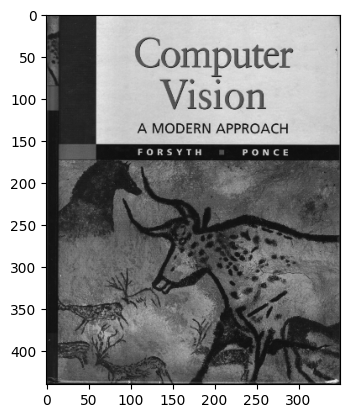

In [795]:
I1_path = '../data/cv_cover.jpg'

# I1 = Image.open(img1_path)
I1 = Image.open(I1_path).convert("RGB")  
# I1 = cv2.imread(I1_path)
I1 = np.array(I1).astype(np.float32) / 255 #normalize

plt.imshow(I1)

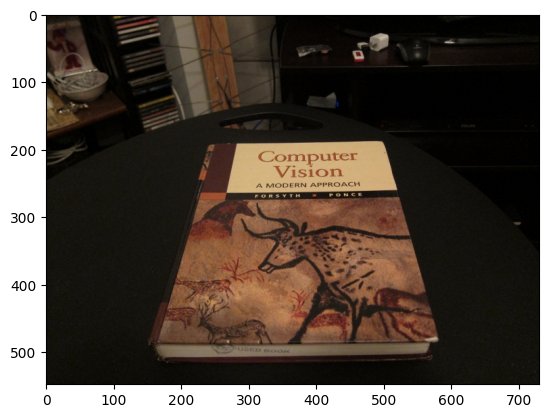

In [861]:
I2_path = '../data/cv_desk.png'

# img = Image.open(img_path)
I2 = Image.open(I2_path).convert("RGB")
# I2 = Image.open(I2_path)

# img = skimage.color.rgb2lab(img)
# I2 = cv2.imread(I2_path)

I2 = np.array(I2).astype(np.float32)/ 255 #normalize

plt.imshow(I2)

In [862]:
I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

locs1 = corner_detection(I1_gray, sigma)
locs2 = corner_detection(I2_gray, sigma)

desc1, locs1 = computeBrief(I1_gray, locs1)
desc2, locs2 = computeBrief(I2_gray, locs2)

matches = briefMatch(desc2, desc1, ratio)

In [872]:
fast = cv2.FastFeatureDetector_create() 
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# brief = cv2.BriefDescriptorExtractor_create()

train_keypoints = fast.detect(I1_gray, None)
test_keypoints = fast.detect(I2_gray, None)
train_keypoints, train_descriptor = brief.compute(I1_gray, train_keypoints)
test_keypoints, test_descriptor = brief.compute(I2_gray, test_keypoints)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

# Q4

In [601]:
img_pano_left = Image.open('../data/pano_left.jpg').convert("RGB")  
img_pano_left = np.array(img_pano_left).astype(np.float32) / 255 #normalize

img_pano_right = Image.open('../data/pano_right.jpg').convert("RGB")  
img_pano_right = np.array(img_pano_right).astype(np.float32) / 255 #normalize

matches, locs1, locs2 = matchPics(img_pano_left, img_pano_right, opts)

locs1_matched = locs1[matches[:, 0]]
locs2_matched = locs2[matches[:, 1]]

bestH2to1, inliers = computeH_ransac(locs1_matched, locs2_matched, opts)

width = img_pano_left.shape[1] + img_pano_right.shape[1]
height = img_pano_left.shape[0] + img_pano_right.shape[0]

img_warped = cv2.warpPerspective(img_pano_right.swapaxes(0, 1), bestH2to1, (height, width)).swapaxes(0, 1)
img_warped[0:img_pano_left.shape[0], 0:img_pano_left.shape[1]] = img_pano_left


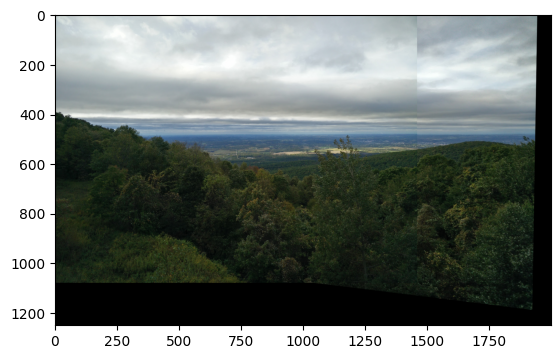

In [602]:
plt.imshow(img_warped[:1250,:2000])

In [608]:
img_pano_left = Image.open('../data/my_pano_left.jpeg').convert("RGB")  
img_pano_left = np.array(img_pano_left).astype(np.float32) / 255 #normalize

img_pano_right = Image.open('../data/my_pano_right.jpeg').convert("RGB")  
img_pano_right = np.array(img_pano_right).astype(np.float32) / 255 #normalize

matches, locs1, locs2 = matchPics(img_pano_left, img_pano_right, opts)

locs1_matched = locs1[matches[:, 0]]
locs2_matched = locs2[matches[:, 1]]

bestH2to1, inliers = computeH_ransac(locs1_matched, locs2_matched, opts)

width = img_pano_left.shape[1] + img_pano_right.shape[1]
height = img_pano_left.shape[0] + img_pano_right.shape[0]

img_warped = cv2.warpPerspective(img_pano_right.swapaxes(0, 1), bestH2to1, (height, width)).swapaxes(0, 1)
img_warped[0:img_pano_left.shape[0], 0:img_pano_left.shape[1]] = img_pano_left


In [569]:
inlier_idx

array([1])

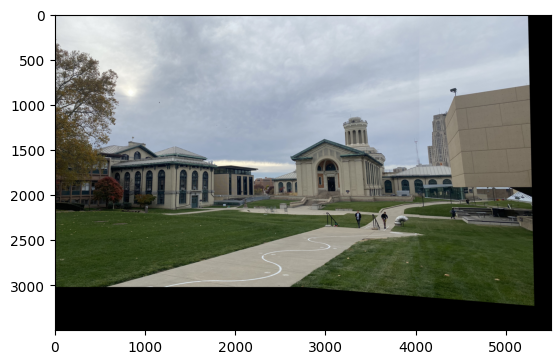

In [610]:
plt.imshow(img_warped[:3500,:5500])

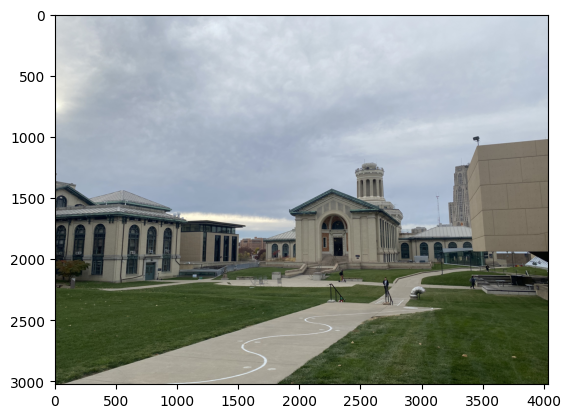

In [605]:
plt.imshow(img_pano_left)

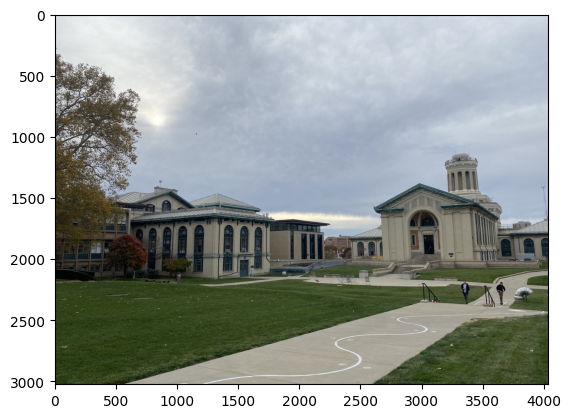

In [606]:
plt.imshow(img_pano_right)

In [ ]:

# Apply panorama correction
width = trainImg.shape[1] + queryImg.shape[1]
height = trainImg.shape[0] + queryImg.shape[0]

result = cv2.warpPerspective(trainImg, H, (width, height))
result[0:queryImg.shape[0], 0:queryImg.shape[1]] = queryImg

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()

In [659]:
4032*3032

12225024